# <font color='Black'> Project 2 Regression

In [252]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
#reading data
df=pd.read_csv('avocado2.csv')


In [254]:
df=df.sample(frac=.1,random_state=0)

# Data Exploration and Preprocessing

In [256]:
df.head()

,Sl.No,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Month,Season,Rain,Snow,Month Number
9181,9181,12/6/2015,1.48,4400.25,1358.53,1735.98,0.00,1305.74,130.00,1175.74,NaN,organic,2015,Atlanta,Dec,Winter,No,Yes,12
1013,1013,7/5/2015,NaN,190716.43,4890.33,119457.27,13495.86,52872.97,30631.37,21037.53,1204.07,conventional,2015,Indianapolis,Jul,Fall,Yes,No,7
14625,14625,3/20/2016,1.27,1045450.41,105069.07,352698.21,9425.64,578257.49,252881.52,325375.97,NaN,organic,2016,TotalUS,Mar,Spring,No,No,3
15234,15234,9/10/2017,2.15,9883.59,313.75,4230.58,0.00,5339.26,2166.91,3172.35,NaN,organic,2017,CincinnatiDayton,Sep,Fall,Yes,No,9
18247,18247,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,NaN,organic,2018,WestTexNewMexico,Jan,Spring,No,No,1


In [257]:
df.describe()

,Sl.No,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month Number
count,1825.000000,1810.000000,1.825000e+03,1.825000e+03,1.825000e+03,1.825000e+03,1.825000e+03,1.825000e+03,1.825000e+03,620.000000,1825.000000,1825.000000
mean,9181.404932,1.417840,8.800425e+05,3.008588e+05,3.009328e+05,2.329346e+04,2.549553e+05,1.932733e+05,5.843724e+04,9550.887774,2016.129863,6.280548
std,5223.757500,0.401679,3.407794e+06,1.250146e+06,1.164668e+06,1.045785e+05,9.958174e+05,7.535237e+05,2.490433e+05,28306.466028,0.924870,3.468875
min,8.000000,0.530000,5.888700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,2015.000000,1.000000
25%,4693.000000,1.110000,9.267690e+03,8.220800e+02,2.732340e+03,0.000000e+00,4.431280e+03,2.239500e+03,1.225100e+02,123.492500,2015.000000,3.000000
50%,9277.000000,1.380000,1.000361e+05,8.217170e+03,2.785819e+04,1.807200e+02,3.745965e+04,2.396951e+04,2.557730e+03,1269.245000,2016.000000,6.000000
75%,13591.000000,1.680000,4.317914e+05,1.085584e+05,1.449582e+05,6.909700e+03,1.066111e+05,8.323120e+04,2.380356e+04,5056.632500,2017.000000,9.000000
max,18247.000000,2.960000,4.044960e+07,1.550361e+07,1.332657e+07,1.880231e+06,1.489489e+07,1.139283e+07,3.275463e+06,317517.950000,2018.000000,12.000000


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 9181 to 10938
Data columns (total 19 columns):
Sl.No           1825 non-null int64
Date            1825 non-null object
AveragePrice    1810 non-null float64
Total Volume    1825 non-null float64
4046            1825 non-null float64
4225            1825 non-null float64
4770            1825 non-null float64
Total Bags      1825 non-null float64
Small Bags      1825 non-null float64
Large Bags      1825 non-null float64
XLarge Bags     620 non-null float64
Type            1825 non-null object
Year            1825 non-null int64
Region          1825 non-null object
Month           1825 non-null object
Season          1825 non-null object
Rain            1825 non-null object
Snow            1825 non-null object
Month Number    1825 non-null int64
dtypes: float64(9), int64(3), object(7)
memory usage: 285.2+ KB


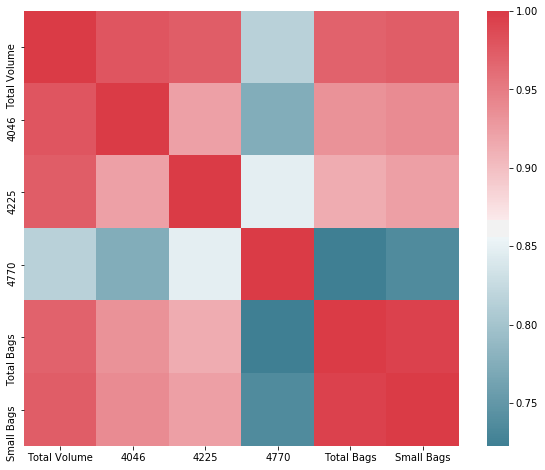

In [259]:
#finding correlations between numerical features
import seaborn as sns
df1=df.iloc[:,3:9]
f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [260]:
#displaying columns having null values
df.columns[df.isnull().any()]

Index(['AveragePrice', 'XLarge Bags'], dtype='object')

In [261]:
#imputing NAN values with mean
df['AveragePrice'] = df.groupby('Type')['AveragePrice'].transform(lambda x: x.fillna(x.mean()))
df['XLarge Bags'] = df.groupby('Type')['XLarge Bags'].transform(lambda x: x.fillna(x.mean()))



In [262]:
#Mapping binary variables to 0 and 1 
df.Rain = df.Rain.replace({'No' : 0, 'Yes' : 1}) 
df.Snow = df.Snow.replace({'No' : 0, 'Yes' : 1})
df.Type = df.Type.replace({'conventional' : 0, 'organic' : 1}) 


In [263]:
#Replacing values with one hot vector
df = pd.get_dummies(df, columns = ['Year'], prefix = ['Year'])
df = pd.get_dummies(df, columns = ['Region'], prefix = ['Region'])
df = pd.get_dummies(df, columns = ['Month'], prefix = ['Month'])
df = pd.get_dummies(df, columns = ['Season'], prefix = ['Season'])

In [264]:
#Dropping unnecessary/ redundant columns
df.drop(['Date'],axis=1,inplace= True)
df.drop(['Sl.No'],axis=1,inplace= True)
df.drop(['Total Volume'],axis=1,inplace= True)
df.drop(['Total Bags'],axis=1,inplace= True)
df.drop(['Month Number'],axis=1,inplace= True)

In [265]:
# Creating Feature and target variable
y = df['AveragePrice']
X = df.drop(['AveragePrice'], axis = 1)
names = list(X.columns.values)

In [267]:
# Creating Feature and target variable
y = df['AveragePrice']
X = df.drop(['AveragePrice'], axis = 1)
names = list(X.columns.values)
#Scaling & splitting into train and test dataset
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Bagging

In [268]:
#Decision tree
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_clf =  DecisionTreeRegressor(random_state = 0) 
bag_clf = BaggingRegressor(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('Train score',bag_clf.score(X_train, y_train))
print('Test score',bag_clf.score(X_test, y_test))

Train score 0.6396427418855948
Test score 0.587742419732642


In [270]:
#Linear regression
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

dt_clf =  LinearRegression() 
bag_clf = BaggingRegressor(dt_clf)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('Train score',bag_clf.score(X_train, y_train))
print('Test score',bag_clf.score(X_test, y_test))

Train score 0.6447499171984035
Test score 0.5593015219706792


In [271]:
#Random forest
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print('Train score',rnd_clf.score(X_train, y_train))
print('Test score',rnd_clf.score(X_test, y_test))

Train score 0.6468286653437065
Test score 0.5502650062405123


# Pasting

In [272]:
#Decision tree
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dt_clf =  DecisionTreeRegressor(random_state = 0) 
bag_clf = BaggingRegressor(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('Train score',bag_clf.score(X_train, y_train))
print('Test score',bag_clf.score(X_test, y_test))

Train score 0.6473590961524682
Test score 0.5946535155538744


In [273]:
#Linear regression
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

dt_clf =  LinearRegression() 
bag_clf = BaggingRegressor(dt_clf,bootstrap=False)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('Train score',bag_clf.score(X_train, y_train))
print('Test score',bag_clf.score(X_test, y_test))

Train score 0.6468944117924181
Test score 0.5636503828315553


In [274]:
#Random forest
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1,bootstrap=False, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print('Train score',rnd_clf.score(X_train, y_train))
print('Test score',rnd_clf.score(X_test, y_test))

Train score 0.5910272344787159
Test score 0.4582912689126317


# Adaboost 

In [275]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(
    DecisionTreeRegressor(), n_estimators=500, learning_rate=0.9, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.9996
Test score: 0.7253


In [276]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(
    LinearRegression(), n_estimators=10, learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.6309
Test score: 0.5342


# Gradient Boosting

In [279]:
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
params = {
    'n_estimators': [50, 100, 200,500],
    'learning_rate':[0.1, 0.25, 0.5, 0.75, 1]
    }

gc = GradientBoostingRegressor(random_state=0)

gc_grid = GridSearchCV(estimator=gc, param_grid=params, cv=5,iid = False)
gc_grid.fit(X_train, y_train)
best_params = gc_grid.best_params_
print(best_params)

c:\users\sneha liza george\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'learning_rate': 0.1, 'n_estimators': 500}


In [280]:
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import recall_score


gc = GradientBoostingRegressor(random_state=0,learning_rate= 0.1, n_estimators = 500)
gc.fit(X_train, y_train)
y_pred= gc.predict(X_test)
print('Train score: {:.4f}'.format(gc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(gc.score(X_test, y_test)))

Train score: 0.9412
Test score: 0.7509


# PCA

In [281]:
# Creating Feature and target variable
y = df['AveragePrice']
X = df.drop(['AveragePrice'], axis = 1)
names = list(X.columns.values)
#Scaling & splitting into train and test dataset
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [282]:
from sklearn.decomposition import PCA
pca = PCA(n_components=65)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3',
                          'principal component 4', 'principal component 5', 'principal component 6',
                          'principal component 7', 'principal component 8', 'principal component 9',
                          'principal component 10', 'principal component 11', 'principal component 12',
                          'principal component 13', 'principal component 14', 'principal component 15', 
                          'principal component 16', 'principal component 17', 'principal component 18', 
                          'principal component 19','principal component 20', 'principal component 21',
                          'principal component 22',
                          'principal component 23', 'principal component 24', 'principal component 25',
                          'principal component 26', 'principal component 27', 'principal component 28',
                          'principal component 29', 'principal component 30', 'principal component 31', 
                          'principal component 32','principal component 33', 'principal component 34', 
                          'principal component 35',
                          'principal component 36', 'principal component 37', 'principal component 38',
                          'principal component 39', 'principal component 40', 'principal component 41',
                          'principal component 42', 'principal component 43',
                          'principal component 44', 'principal component 45', 'principal component 46',
                          'principal component 47', 'principal component 48', 'principal component 49','principal component 50'
                         ,
                         'principal component 51', 'principal component 52', 'principal component 53',
                          'principal component 54', 'principal component 55', 'principal component 56',
                          'principal component 57', 'principal component 58', 'principal component 59',
                          'principal component 60','principal component 61', 'principal component 62', 'principal component 63',
                          'principal component 64', 'principal component 65'])

In [283]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 56,principal component 57,principal component 58,principal component 59,principal component 60,principal component 61,principal component 62,principal component 63,principal component 64,principal component 65
0,-0.960615,2.637565,-1.411701,-0.879872,-1.351151,-1.341275,1.481301,1.936232,-0.093120,0.807181,...,0.289426,-0.089653,-0.898951,0.284482,0.589233,1.837274,-0.503363,0.124744,-0.916952,-2.068852
1,-0.420814,-2.666090,-1.880717,-0.502217,-0.399477,-0.516453,0.209275,0.585650,-2.397758,-0.449515,...,0.228169,-0.791927,1.346568,-0.133753,0.328647,-0.397283,1.479893,-0.508633,1.233658,0.835310
2,2.163969,0.082146,1.819162,-1.228000,-0.341767,1.427034,1.740093,0.836960,0.767482,-0.895097,...,0.391972,0.332891,0.168479,0.257417,-0.250484,1.624782,-0.233683,0.158186,-1.639428,-0.194715
3,-0.750427,-2.950321,-1.883113,-0.501615,0.724095,-0.888319,1.131758,-0.430359,2.837142,0.211283,...,0.545031,0.154213,-1.004270,0.474016,0.080496,-0.605871,0.669171,0.733169,0.058910,-0.379444
4,-0.429275,-0.067060,3.014580,-2.265537,0.520638,-0.044892,1.433443,-1.153129,1.642724,0.464771,...,-0.130639,1.206365,-2.057215,-0.944295,3.539220,-0.574644,-0.472738,-0.983877,-0.294182,-0.533892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,-0.382963,0.120614,0.992047,2.555985,0.911797,-1.354328,0.605447,-1.813473,-2.353026,-0.925162,...,1.378532,0.710236,-0.805937,-1.463426,-1.450543,-1.115401,0.650508,-1.123987,-1.116167,1.409609
1821,-0.477665,2.834703,-1.989160,-0.635043,1.164131,-0.308848,-1.573901,-0.976429,0.401069,-0.372293,...,0.323943,-1.273216,-0.852462,1.278595,-1.656841,-2.258364,-1.160130,-0.192061,-0.821369,0.449265
1822,-0.016520,0.108308,1.895882,-1.411357,0.656693,-1.277562,-0.356176,-0.310755,-2.080121,-1.743331,...,0.838994,0.966531,-0.805958,-0.234253,-1.103178,0.253142,0.691452,-1.389206,-0.518220,1.557533
1823,-0.753309,-3.013575,-1.932386,-0.453725,1.176477,1.475854,0.572913,0.858665,0.104913,0.974299,...,2.106992,0.384889,1.724314,2.206176,-0.079748,-0.889737,0.828298,0.262213,-0.794399,-0.469089


In [284]:
pca.explained_variance_ratio_
#95% variance explained

array([0.06635939, 0.04520431, 0.0395337 , 0.03157668, 0.01922997,
       0.01872012, 0.01527342, 0.01515496, 0.01490401, 0.01477337,
       0.01470153, 0.01449508, 0.01441565, 0.01419555, 0.01350333,
       0.01338289, 0.01309098, 0.01260149, 0.01250791, 0.01237308,
       0.01233262, 0.01232588, 0.01231805, 0.01230947, 0.01230341,
       0.01229718, 0.0122953 , 0.01229084, 0.01228875, 0.01228781,
       0.01228459, 0.01228249, 0.01228112, 0.01227998, 0.01227718,
       0.01227426, 0.01227379, 0.01227144, 0.01227066, 0.012269  ,
       0.01226805, 0.01226425, 0.01226301, 0.01225942, 0.01225598,
       0.01225399, 0.01225204, 0.01224959, 0.01224662, 0.01223712,
       0.01223317, 0.01222753, 0.0122104 , 0.01207063, 0.01198121,
       0.01186728, 0.01172484, 0.01138959, 0.01115314, 0.01106656,
       0.01102811, 0.01087309, 0.01066424, 0.01045807, 0.01028075])

In [292]:
X = principalDf
y = df["AveragePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [293]:
##### from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

knn = KNeighborsRegressor(5) 
knn.fit(X_train, y_train)

print('K Neighbour after PCA')
print('Train score: {:.5f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.5f}'.format(knn.score(X_test, y_test)))

K Neighbour after PCA
Train score: 0.48113
Test score: 0.06923


In [294]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

knn = KNeighborsRegressor(5) 
knn.fit(X_train, y_train)

print('K Neighbour after PCA')
print('Train score: {:.5f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.5f}'.format(knn.score(X_test, y_test)))

lreg = LinearRegression()
lreg.fit(X_train, y_train) 

print('\nLinear Regression after PCA')
print('Train score: {:.4f}'.format(lreg.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lreg.score(X_test, y_test)))

clflin = LinearSVR()
clflin.fit(X,y)
print('\nLinear SVC after PCA')
print('Train score: {:.4f}'.format(clflin.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clflin.score(X_test, y_test)))

clf2 = SVR(kernel='linear',C=1)
clf2.fit(X_train, y_train)

print('\nKernel Linear SVR after PCA')
print('Train score: {:.4f}'.format(clf2.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf2.score(X_test, y_test)))

clf3 = SVR(kernel='rbf',C=1,gamma=.1)
clf3.fit(X_train, y_train)

print('\nKernel rbf SVR after PCA')
print('Train score: {:.4f}'.format(clf3.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf3.score(X_test, y_test)))

clf4 = SVR(kernel='poly',C=1,gamma=.1)
clf4.fit(X_train, y_train)


print('\nKernel poly SVR after PCA')
print('Train score: {:.4f}'.format(clf4.score(X_train, y_train)))
print('Test score: {:.4f}'.format(clf4.score(X_test, y_test)))


K Neighbour after PCA
Train score: 0.48113
Test score: 0.06923

Linear Regression after PCA
Train score: 0.5557
Test score: 0.4252


c:\users\sneha liza george\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Linear SVC after PCA
Train score: 0.5003
Test score: 0.4514

Kernel Linear SVR after PCA
Train score: 0.5410
Test score: 0.4277

Kernel rbf SVR after PCA
Train score: 0.9181
Test score: 0.1815

Kernel poly SVR after PCA
Train score: 0.9397
Test score: 0.2795


In [ ]:
#to be updated
Model                   Train  Test     Train after PCA Test after PCA
K Neighbour           0.7413    0.5806      0.4811      0.0692
Linear regression     0.6469    0.5637      0.5557      0.4252
Linear SVR            0.6257    0.5587      0.5186      0.4580
Kernel linear SVR     0.6348    0.5644      0.5410      0.4277
RBF SVR               0.8019    0.6673      0.9181      0.1815
Poly SVR              0.7339    0.5825      0.9397      0.2795

# Deep Learning models

In [299]:
from sklearn.model_selection import train_test_split
y = df['AveragePrice']
X = df.drop(['AveragePrice'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state = 0)

In [300]:
# create model
from keras.models import Sequential
from keras.layers import Dense
import numpy

model = Sequential()
model.add(Dense(13, input_dim=83, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))

In [301]:
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [302]:
model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
1368/1368 [==============================] - 0s 144us/step - loss: 0.2459 - mse: 0.2459
Epoch 2/100
1368/1368 [==============================] - 0s 81us/step - loss: 0.1624 - mse: 0.1624
Epoch 3/100
1368/1368 [==============================] - 0s 79us/step - loss: 0.1638 - mse: 0.1638
Epoch 4/100
1368/1368 [==============================] - 0s 93us/step - loss: 0.1666 - mse: 0.1666
Epoch 5/100
1368/1368 [==============================] - 0s 94us/step - loss: 0.1648 - mse: 0.1648
Epoch 6/100
1368/1368 [==============================] - 0s 96us/step - loss: 0.1647 - mse: 0.1647
Epoch 7/100
1368/1368 [==============================] - 0s 92us/step - loss: 0.1649 - mse: 0.1649
Epoch 8/100
1368/1368 [==============================] - 0s 93us/step - loss: 0.1648 - mse: 0.1648
Epoch 9/100
1368/1368 [==============================] - 0s 109us/step - loss: 0.1658 - mse: 0.1658
Epoch 10/100
1368/1368 [==============================] - 0s 93us/step - loss: 0.1655 - mse: 0.1655
Epoch 1

In [303]:
model.evaluate(X_test, y_test)

457/457 [==============================] - 0s 116us/step


[0.15344429198709567, 0.1534442901611328]

In [304]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -0.01
Test score: -0.02


# Grid Search

In [320]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [321]:
from sklearn.model_selection import train_test_split
y = df['AveragePrice']
X = df.drop(['AveragePrice'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state = 0)

In [322]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=83, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [323]:
np.random.seed(0)

In [324]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [325]:
grid_search_result = grid_search.fit(X, y)

In [326]:
grid_search_result

GridSearchCV(cv=5, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000013D3E557FC8>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [10, 20, 30, 40],
                         'epochs': [10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [319]:
print("Best parameters: {}".format(grid_search.best_params_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=83, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=20)

In [ ]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))